In [72]:
# import opencv module
import cv2
from matplotlib import pyplot as plt
import numpy as np
import copy

# For interactive python:
%matplotlib inline  

In [80]:
cap = cv2.VideoCapture('video.MOV')
# cap = cv2.VideoCapture(0)

## VideoWrite (혹은 XVID) 는 BGR format만 저장 가능하다
fourcc = cv2.VideoWriter_fourcc(*'XVID')
frame_width = int( cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height =int( cap.get( cv2.CAP_PROP_FRAME_HEIGHT)) 

out = cv2.VideoWriter('output.avi', fourcc, 30.0,(frame_width,frame_height))

white_low = np.array([[[100, 100, 200]]])
white_high = np.array([[[255, 255, 255]]])


In [81]:
while True:
    ret,frame = cap.read()
    if ret:
#         frame = cv2.bilateralFilter(frame,9,25,75)
        gray=cv2.cvtColor(frame,cv2.COLOR_RGB2GRAY)
        img_hsv = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)
        
        s_channel=img_hsv[:,:,2]
        yellow_mask = cv2.inRange(img_hsv, yellow_low, yellow_high)
        color_mask = cv2.bitwise_and(frame,frame, mask=yellow_mask)

        cv2.namedWindow('original', cv2.WINDOW_NORMAL)
        
        cv2.imshow('original', color_mask)
        color_mask2=cv2.cvtColor(color_mask, cv2.COLOR_HSV2RGB)
        out.write(color_mask2)
        c=cv2.waitKey(1)
        if c == 27:
            break
#         if cv2.waitKey(1) & 0xFF == ord('q'):
#             break
    else:
        break

cap.release()
out.release()
cv2.destroyAllWindows()

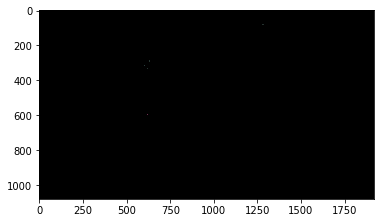

In [79]:
plt.imshow(color_mask2)